<a href="https://colab.research.google.com/github/elyal2/UPC2023/blob/main/2_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Big Data Analytics and Machine Learning with NLP and Computer Vision**
# *Talk Overview*
Welcome to our comprehensive talk on Big Data Analytics and Machine Learning, where we'll delve into the fascinating realms of Natural Language Processing (NLP) and Computer Vision. This talk is designed to equip you with the essential skills and knowledge needed to analyze, interpret, and glean insights from large datasets using advanced machine learning techniques.

Throughout this journey, we'll explore how machine learning can be applied to understand and process human languages and visual data, opening doors to numerous applications in various industries.

# Introduction to Challenges in Natural Language Processing (NLP)

Natural Language Processing (NLP) is a field at the intersection of computer science, artificial intelligence, and linguistics. It involves the creation of computational algorithms to process and understand human language. NLP has many challenges due to the complexity and nuance of human language, including ambiguity, sarcasm, idioms, and the need for context understanding.



## The Rise of Transformers

Transformers have revolutionized the way we approach NLP tasks. They are a type of neural network architecture that, unlike previous models, are exceptionally good at handling sequences of data, such as text. Transformers are based on the mechanism of [self-attention](https://poloclub.github.io/dodrio/), weighting the influence of different parts of the input data.



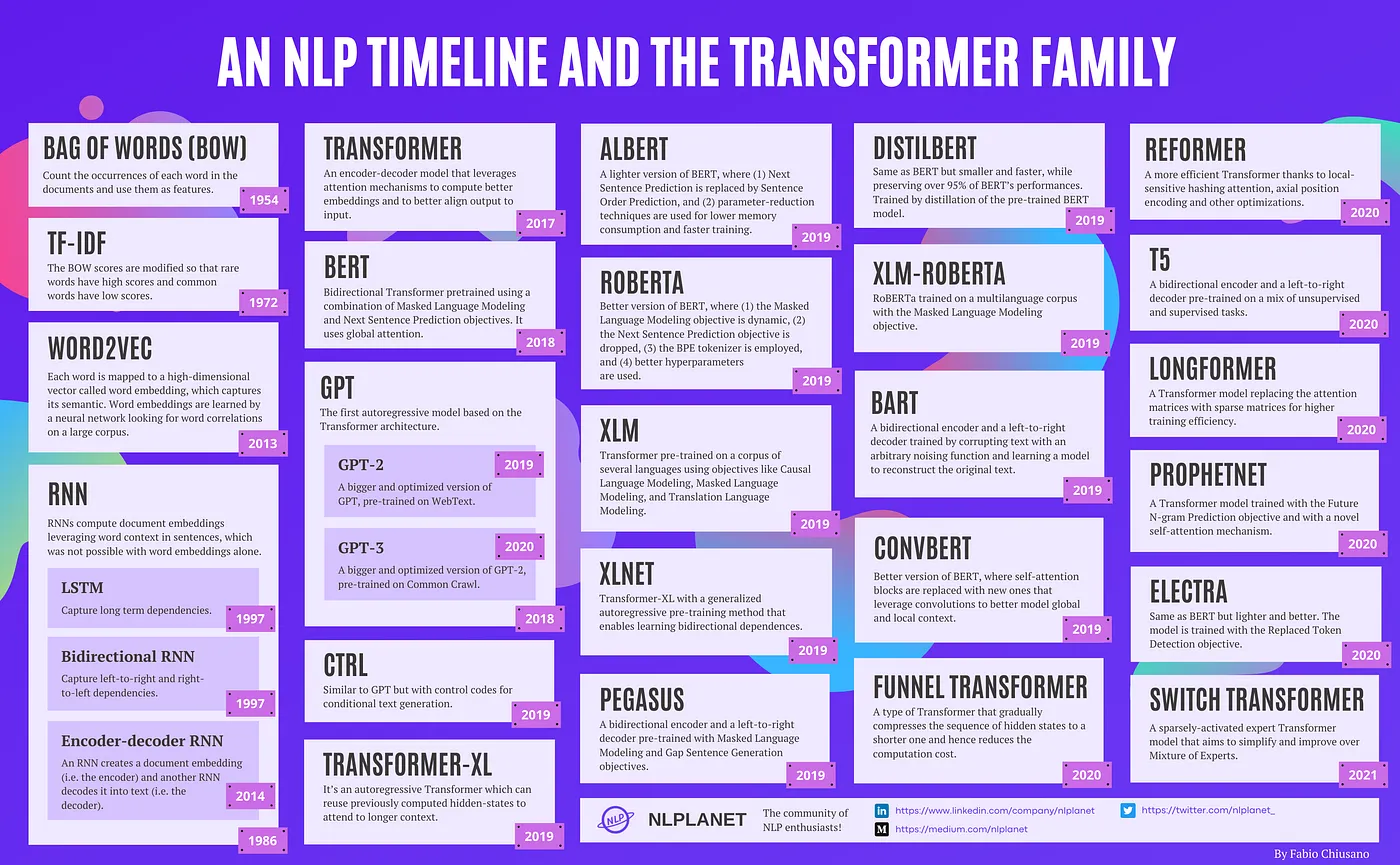

source:   [A Brief Timeline of NLP from Bag of Words to the Transformer Family](https://medium.com/nlplanet/a-brief-timeline-of-nlp-from-bag-of-words-to-the-transformer-family-7caad8bbba56)


## Hugging Face
[Hugging Face](https://huggingface.co/) is an AI research organization and company known for its pioneering work in the field of natural language processing (NLP). It has gained widespread recognition for developing and open-sourcing the transformers library, which provides a collection of state-of-the-art machine learning models, primarily focused on NLP tasks.

One of the key impacts of Hugging Face's work is the facilitation of the open-source movement in the AI field. By open-sourcing their models and training frameworks, Hugging Face has cultivated a collaborative community where individuals and organizations can contribute to the advancement of NLP technologies. This collaborative approach has accelerated innovation, improved model performance, and increased the pace at which NLP models evolve.


Moreover, Hugging Face has also contributed to the ML community through their model hub, which allows users to share and discover pre-trained models, and through active participation in research, often publishing papers and releasing datasets. Their work has also promoted the practice of fine-tuning pre-trained models for specific tasks, which has become a standard approach in NLP tasks due to its effectiveness and efficiency.

### Hugging Face Transformers

Hugging Face provides a powerful and easy-to-use library for implementing transformer models. The library includes pre-trained models that can be fine-tuned on a specific task, such as text classification, summarization, and question answering.

The Hugging Face transformers library has democratized access to powerful NLP models like [BERT](https://huggingface.co/roberta-base?text=My+jaguar+eats+gas%2C+it+%3Cmask%3E+very+fast%21), [GPT-2](https://huggingface.co/gpt2?text=my+jaguar+eats+gas%2C+it), [T5](https://huggingface.co/google/flan-t5-large?text=My+jaguar+eats+gas%2C+it), and many others by making them available with an easy-to-use interface. This has enabled researchers, developers, and companies around the world to implement cutting-edge NLP features into their applications without the need for the deep and specialized expertise that was once required to build such models from scratch.



## Lesson 2: Examples of NLP Tasks

In this section, we will explore some primary NLP tasks using Hugging Face transformers.



### Text Classification
Text classification involves assigning categories or labels to a piece of text. We will use a pre-trained transformer and fine-tune it on a dataset for sentiment analysis.

We will use: https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english



In [1]:
# Example Python code for text classification
from transformers import pipeline

classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')
result = classifier("The battery life was a bit disappointing.")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: NEGATIVE, with score: 0.9997


The **pipeline** function is part of the transformers library provided by [Hugging Face](https://huggingface.co/docs), which is a popular and extensive library that offers a collection of pre-trained models for various Natural Language Processing (NLP) tasks. The library provides a high-level API for common tasks such as text classification, question answering, translation, summarization, and more.

The result is usually a list with a dictionary for each piece of text analyzed. Each dictionary typically contains the keys 'label' and 'score', where 'label' is the predicted sentiment, and 'score' is the confidence level of the prediction.

### Zero-Shot Learning
Zero-shot learning models are designed to understand and perform tasks they haven't been explicitly trained on. This is particularly valuable in scenarios where labeled data is scarce.

**Zero-Shot Classification**
We will demonstrate zero-shot classification, where the model classifies text into categories it has not seen during training.

We will use: https://huggingface.co/facebook/bart-large-mnli

In [4]:
# Example Python code for zero-shot classification
from transformers import pipeline

zero_shot_classifier = pipeline('zero-shot-classification', model="facebook/bart-large-mnli")
result = zero_shot_classifier(
    "This is a new breakthrough in NLP, allowing models to generalize to tasks not seen during training.",
    candidate_labels=['education', 'politics', 'business', 'technology']
)
print(f"Label: {result['labels'][0]}, with score: {round(result['scores'][0], 4)}")
print(f"Label: {result['labels'][1]}, with score: {round(result['scores'][1], 4)}")


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Label: technology, with score: 0.9717
Label: business, with score: 0.0147


The result is a dictionary containing the keys 'sequence', 'labels', and 'scores'. 'sequence' is the input text, 'labels' is the list of possible labels, and 'scores' is a list of confidence scores corresponding to each label.

### Summarization
Summarization aims to shorten a piece of text, distilling the most essential information. We will use a pre-trained model for summarizing a news article.

We will use this model: https://huggingface.co/google/pegasus-cnn_dailymail

This is the text to analyze:

```
Unai Emery came back to haunt Arsenal on Saturday as Aston Villa cut another English Premier League title challenger down to size.
A 1-0 win at Villa Park set a new club record of 15 straight home victories in the league and moved Emery's team to within two points of first-placed Liverpool.
How sweet it must have been for the Spanish coach to get the better of his former club after being fired by Arsenal in 2019. He had already rebuilt his reputation before taking over a Villa team that was in danger of being relegated last season. But his work with the Midlands club could be his finest yet in a career that has seen him win four Europa League titles.
Third-placed Villa looks like a serious title contender after a recent run that includes wins against Manchester City and Tottenham.
"We are increasing mentality and believing how we can be stronger," Emery said. "We want to be in the top eight teams, but a lot of teams want to be there. At the beginning there were seven top teams, but we will fight to be in there. While we are in we can be excited and motivated to get it."
John McGinn scored the only goal after seven minutes and Villa held on to deny late-goal specialist Arsenal an equalizer that manager Mikel Arteta believed was the least his team deserved.
"I'm really proud of the way the team played in this stadium against this team," Arteta said. "We deserved to win the game, but you have to be better in the boxes and things have to go your way as well.
"I see many, many teams come here and I haven't seen many do what we have done to them today. The result is not there but, certainly, the way we played it was there."
Arsenal led the league at the start of the day and dropped to second and a point behind Liverpool.
```
[Aston Villa beats Arsenal, 'lucky' Liverpool leads the Premier League](https://www.marca.com/en/football/premier-league/2023/12/09/6574d7ac22601d04588b4583.html)

In [2]:
# Install transformers and SentencePiece
!pip install --upgrade transformers[sentencepiece]
!pip install sentencepiece

# Example Python code for summarization
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

def summarize_text(text, model_name='google/pegasus-xsum'):
    # Load the tokenizer and model
    tokenizer = PegasusTokenizer.from_pretrained(model_name)
    model = PegasusForConditionalGeneration.from_pretrained(model_name)

    # Tokenize the input text
    tokens = tokenizer(text, truncation=True, padding='longest', return_tensors='pt')

    # Generate summary
    summary = model.generate(**tokens)

    # Decode the summary
    summary_text = tokenizer.decode(summary[0], skip_special_tokens=True)

    return summary_text

# Example text
text = """Unai Emery came back to haunt Arsenal on Saturday as Aston Villa cut another English Premier League title challenger down to size.
A 1-0 win at Villa Park set a new club record of 15 straight home victories in the league and moved Emery's team to within two points of first-placed Liverpool.
How sweet it must have been for the Spanish coach to get the better of his former club after being fired by Arsenal in 2019. He had already rebuilt his reputation before taking over a Villa team that was in danger of being relegated last season. But his work with the Midlands club could be his finest yet in a career that has seen him win four Europa League titles.
Third-placed Villa looks like a serious title contender after a recent run that includes wins against Manchester City and Tottenham.
"We are increasing mentality and believing how we can be stronger," Emery said. "We want to be in the top eight teams, but a lot of teams want to be there. At the beginning there were seven top teams, but we will fight to be in there. While we are in we can be excited and motivated to get it."
John McGinn scored the only goal after seven minutes and Villa held on to deny late-goal specialist Arsenal an equalizer that manager Mikel Arteta believed was the least his team deserved.
"I'm really proud of the way the team played in this stadium against this team," Arteta said. "We deserved to win the game, but you have to be better in the boxes and things have to go your way as well.
"I see many, many teams come here and I haven't seen many do what we have done to them today. The result is not there but, certainly, the way we played it was there."
Arsenal led the league at the start of the day and dropped to second and a point behind Liverpool."""

# Generate summary
summary = summarize_text(text,'google/pegasus-cnn_dailymail')
print(summary)



tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Aston Villa beat Arsenal 1-0 in the English Premier League.<n>John McGinn scored the only goal after seven minutes at Villa Park.<n>Villa is now within two points of first-placed Liverpool.


The result is a list with a dictionary that includes the keys 'summary_text', which contains the generated summary of the input text.

### Question Answering
Question answering models can find the answer to a question in a given context. We will use a pre-trained model to answer a question using a paragraph from [Wikipedia](https://en.wikipedia.org/wiki/France).

We will use: https://huggingface.co/distilbert-base-cased-distilled-squad

In [3]:
# Example Python code for question answering
from transformers import pipeline

qa_pipeline = pipeline('question-answering', model="distilbert-base-cased-distilled-squad")
context = """France (French: [fʁɑ̃s] ⓘ), officially the French Republic (French: République française [ʁepyblik fʁɑ̃sɛːz]),[14] is a country located primarily in Western Europe. It also includes overseas regions and territories in the Americas and the Atlantic, Pacific and Indian oceans,[XII] giving it one of the largest discontiguous exclusive economic zones in the world. Metropolitan France shares borders with Belgium and Luxembourg to the north, Germany to the north east, Switzerland to the east, Italy and Monaco to the south east, Andorra and Spain to the south, and a maritime border with the United Kingdom to the north west. Its metropolitan area extends from the Rhine to the Atlantic Ocean and from the Mediterranean Sea to the English Channel and the North Sea. Its overseas territories include French Guiana in South America, Saint Pierre and Miquelon in the North Atlantic, the French West Indies, and many islands in Oceania and the Indian Ocean. Its eighteen integral regions (five of which are overseas) span a combined area of 643,801 km2 (248,573 sq mi) and have a total population of over 68 million as of January 2023.[5][8] France is a unitary semi-presidential republic with its capital in Paris, the country's largest city and main cultural and commercial centre; other major urban areas include Marseille, Lyon, Toulouse, Lille, Bordeaux, Strasbourg, and Nice."""
result = qa_pipeline(question="What is the capital of France?", context=context)
print(f"Answer: '{result['answer']}' with score: {round(result['score'], 4)}")


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Answer: 'Paris' with score: 0.9945


The result is a dictionary containing the keys 'score', 'start', 'end', and 'answer', with 'score' representing the confidence of the answer, 'start' and 'end' indicating the position of the answer in the input context, and 'answer' containing the text of the answer itself.

### Text Generation with GPT-2
GPT-2, developed by OpenAI, is a large-scale unsupervised language model that excels in generating coherent and contextually relevant text. It's a pivotal model in natural language processing, capable of completing texts, answering questions, summarizing passages, and much more.

**Text Expansion and Generation**

We will demonstrate text generation and expansion, where the model takes a given prompt and continues the text in a coherent and contextually appropriate manner. This capability is particularly useful for creative writing, content creation, and even in generating code snippets.

We will use the GPT-2 model, available at https://huggingface.co/gpt2, which is known for its ability to generate high-quality, contextually relevant text based on the given input:  "**In a distant future, humanity has**" .

In [9]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def generate_text(prompt, model_name='gpt2', max_length=30):
    # Load pre-trained model tokenizer (vocabulary)
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)

    # Load pre-trained model (weights)
    model = GPT2LMHeadModel.from_pretrained(model_name)

    # Encode context the generation is conditioned on
    inputs = tokenizer.encode_plus(prompt, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    # Set generation parameters
    generation_config = {
        "max_length": max_length,
        "num_return_sequences": 1,
        "pad_token_id": tokenizer.eos_token_id,  # Set pad_token_id to eos_token_id
    }

    # Generate text using the specified generation configuration
    output = model.generate(input_ids, attention_mask=attention_mask, **generation_config)

    # Decode and return the text
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Example prompt
prompt = "In a distant future, humanity has"

# Generate text
generated_text = generate_text(prompt)
print(generated_text)


In a distant future, humanity has been able to build a civilization that is far more advanced than the one we have today.

The future is
